Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import zipfile
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
zip_ref = zipfile.ZipFile("gdrive/MyDrive/assess/melanomaassignment/dataset/CNN_assignment.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/tmp/CNN_assignment/Train")
data_dir_test = pathlib.Path('/tmp/CNN_assignment/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

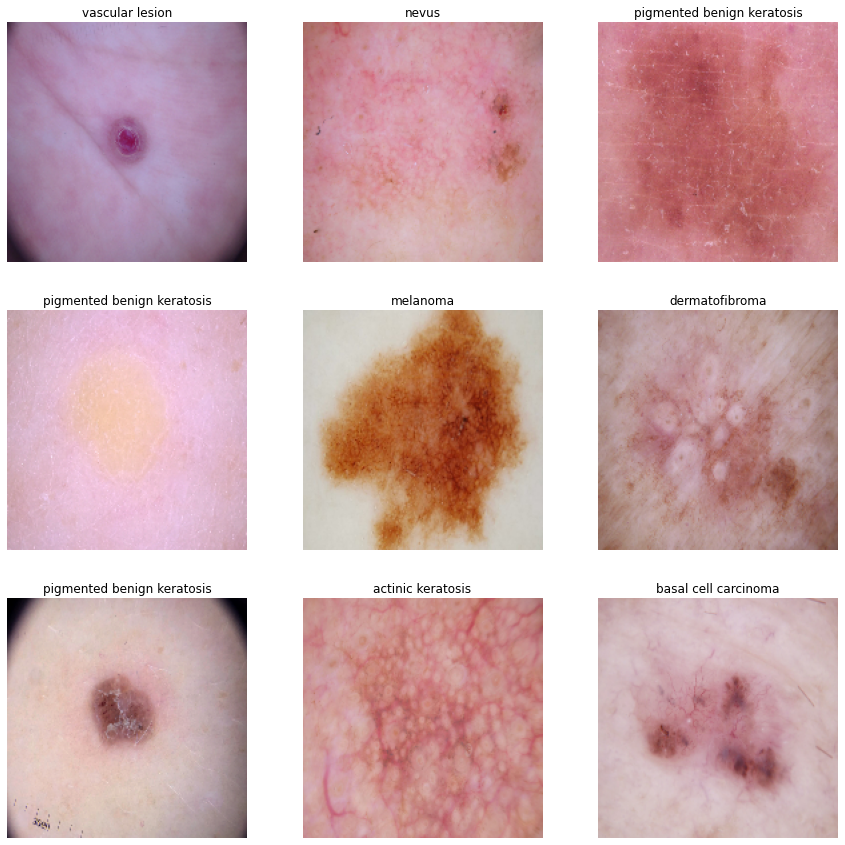

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# View the summary of all layers
#model.summary()

### Train the model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 26s 131ms/step - loss: 2.0719 - accuracy: 0.1702 - val_loss: 2.0268 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 4s 79ms/step - loss: 2.0260 - accuracy: 0.1992 - val_loss: 2.0286 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 4s 76ms/step - loss: 2.0215 - accuracy: 0.2009 - val_loss: 2.0202 - val_accuracy: 0.2036
Epoch 4/20
56/56 [==============================] - 4s 79ms/step - loss: 2.0443 - accuracy: 0.1881 - val_loss: 2.0409 - val_accuracy: 0.1790
Epoch 5/20
56/56 [==============================] - 4s 77ms/step - loss: 2.0234 - accuracy: 0.1992 - val_loss: 2.0249 - val_accuracy: 0.2036
Epoch 6/20
56/56 [==============================] - 4s 79ms/step - loss: 2.0444 - accuracy: 0.2360 - val_loss: 1.9794 - val_accuracy: 0.2371
Epoch 7/20
56/56 [==============================] - 4s 77ms/step - loss: 1.9599 - accuracy: 0.2556 - val_loss: 1.9801 - val_accuracy: 0.2125
Epoch 8/20
56/56 [====

### Visualizing training results

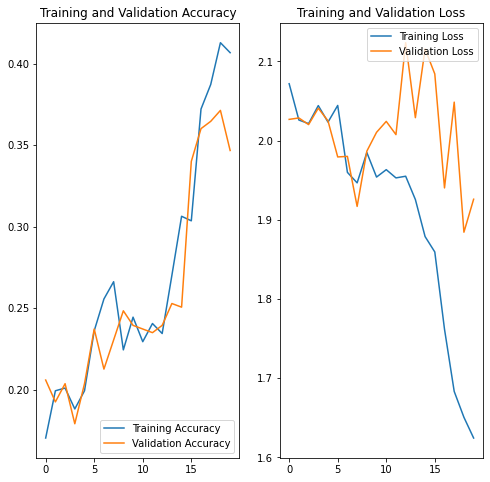

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

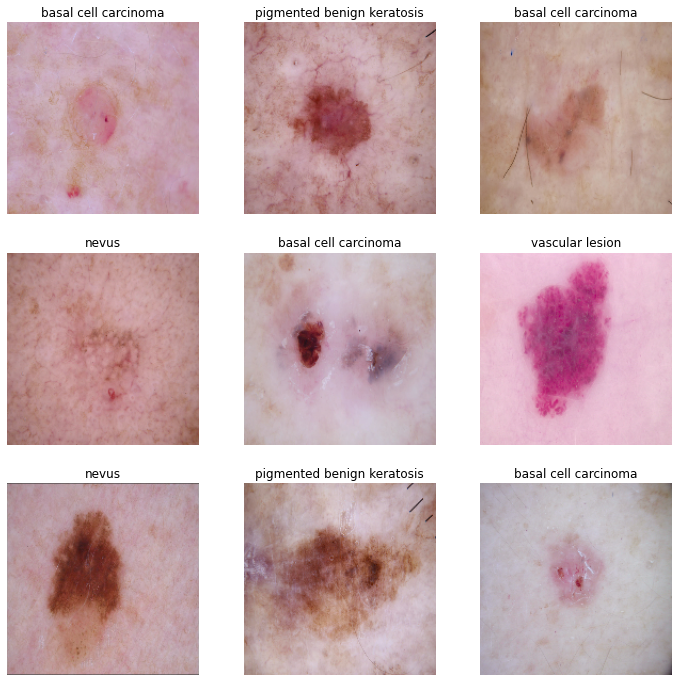

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))



### Compiling the model

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 8s 108ms/step - loss: 2.1077 - accuracy: 0.2026 - val_loss: 1.9523 - val_accuracy: 0.2371
Epoch 2/20
56/56 [==============================] - 6s 103ms/step - loss: 1.9507 - accuracy: 0.2573 - val_loss: 2.0558 - val_accuracy: 0.3177
Epoch 3/20
56/56 [==============================] - 6s 102ms/step - loss: 1.9534 - accuracy: 0.2567 - val_loss: 2.0368 - val_accuracy: 0.2125
Epoch 4/20
56/56 [==============================] - 6s 102ms/step - loss: 2.0113 - accuracy: 0.2260 - val_loss: 1.9772 - val_accuracy: 0.2416
Epoch 5/20
56/56 [==============================] - 6s 103ms/step - loss: 1.8810 - accuracy: 0.2969 - val_loss: 1.9479 - val_accuracy: 0.3266
Epoch 6/20
56/56 [==============================] - 6s 103ms/step - loss: 1.8089 - accuracy: 0.3538 - val_loss: 1.9136 - val_accuracy: 0.3020
Epoch 7/20
56/56 [==============================] - 6s 103ms/step - loss: 1.7290 - accuracy: 0.3811 - val_loss: 1.8303 - val_accuracy: 0.3512
Epoch 

### Visualizing the results

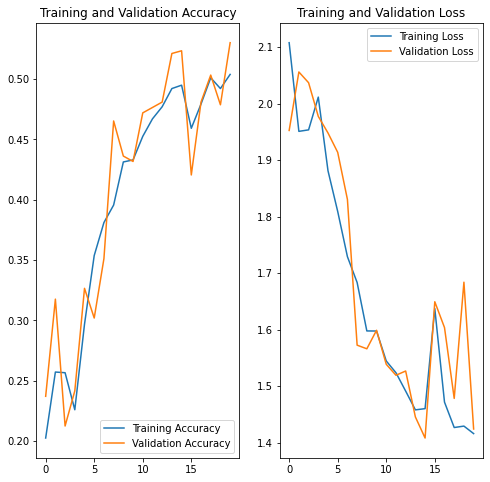

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?



*   From above plot overfitting can be clearly seen.
*   Accuracy is also low at 50%


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [25]:
import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [26]:
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(lesion_list)

2239

In [27]:
dataframe_dict = dict(zip(path_list, lesion_list))
df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
df.shape

(2239, 2)

In [28]:

#path_list=[]
#lesion_list =[]
#for image in data_dir_train.glob('*/*.jpg'):
#    path_list.append(str(image))
#    lesion_list.append(os.path.basename(os.path.dirname(image)))
#original_df = pd.DataFrame(list(zip(path_list, lesion_list)),columns =['Image', 'Disease'])
#original_df

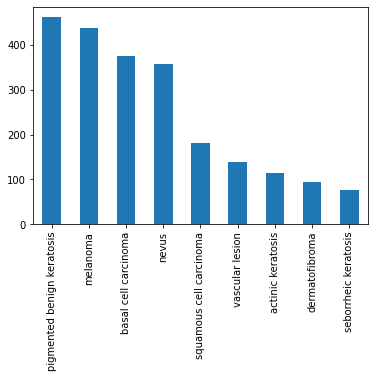

In [29]:
df['Label'].value_counts().plot(kind='bar')

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [30]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [31]:
path_to_training_dataset="/tmp/CNN_assignment/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /tmp/CNN_assignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FAC101A8EE0>: 100%|██████████| 500/500 [00:52<00:00,  9.49 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /tmp/CNN_assignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FABAAEBE0A0>: 100%|██████████| 500/500 [00:40<00:00, 12.39 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /tmp/CNN_assignment/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FAC10017130>: 100%|██████████| 500/500 [00:49<00:00, 10.01 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /tmp/CNN_assignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FAC10078370>: 100%|██████████| 500/500 [00:46<00:00, 10.78 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /tmp/CNN_assignment/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1008x711 at 0x7FABAC7BE220>: 100%|██████████| 500/500 [00:41<00:00, 11.91 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /tmp/CNN_assignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FABAC74ADC0>: 100%|██████████| 500/500 [00:42<00:00, 11.76 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /tmp/CNN_assignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FAC100A1130>: 100%|██████████| 500/500 [00:35<00:00, 14.00 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /tmp/CNN_assignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FABAC4CC5B0>: 100%|██████████| 500/500 [00:33<00:00, 14.89 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /tmp/CNN_assignment/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FABAC538040>: 100%|██████████| 500/500 [00:42<00:00, 11.73 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [32]:
#data_dir_train = pathlib.Path("/tmp/CNN_assignment/Train/output")
#image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
#print(image_count_train)



image_count_train = len(list(data_dir_train.glob('output/*/*.jpg')))
print(image_count_train)
     


4500


In [33]:
import glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, 'output','*', '*.jpg'))]
len(path_list_new)


4500

In [34]:
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, 'output','*', '*.jpg'))]
len(lesion_list_new)


4500

In [35]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2.head()

,Path,Label
0,/tmp/CNN_assignment/Train/output/basal cell ca...,basal cell carcinoma
1,/tmp/CNN_assignment/Train/output/basal cell ca...,basal cell carcinoma
2,/tmp/CNN_assignment/Train/output/basal cell ca...,basal cell carcinoma
3,/tmp/CNN_assignment/Train/output/basal cell ca...,basal cell carcinoma
4,/tmp/CNN_assignment/Train/output/basal cell ca...,basal cell carcinoma


In [36]:
new_df = df.append(df2)
new_df.shape

(6739, 2)

In [ ]:
#images_output=[]
#diseases_output=[]
#for image in output_dir_train.glob('*/*.jpg'):
#    images_output.append(str(image))
#    diseases_output.append(os.path.basename(os.path.dirname(image)))
#df_output = pd.DataFrame(list(zip(images_output, diseases_output)),columns =['Image', 'Disease'])
#df_output

In [ ]:
#df_combined = df.append(df_output)
#df_combined.shape

### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
new_df['Label'].value_counts().plot(kind='bar')

In [ ]:

#for image in output_dir_train.glob('*/*.jpg'):
#    images.append(str(image))
#    diseases.append(os.path.basename(os.path.dirname(image)))
#df = pd.DataFrame(list(zip(images, diseases)),columns =['Image', 'Disease'])
#df


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
from keras.layers import BatchNormalization
#model = Sequential()

#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(img_height, img_width,3)))
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

#model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.25))

#model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
#model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
#model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.4))

#model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.4))

#model.add(Flatten())

#model.add(Dense(128, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
#model.add(Dense(1, activation='softmax'))

#model.summary()

In [ ]:
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
#optimizer = 'adam'
#loss_fn = "binary_crossentropy"
#model.compile(optimizer=optimizer,
#              loss=loss_fn,
#              metrics=['accuracy'])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



1. Model does better but still seems to overfit
2. Augmentation did help to improve *accurary*
3. Adding more layers might help improving overfitting